In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
os.chdir(r'F:\00\研一\非结构化数据\孙怡帆\facebook_combined.txt') 
print(os.listdir())
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)

['facebook_combined.txt']


### 查看图的基本信息

In [3]:
n_n = G.number_of_nodes()
n_e = G.number_of_edges()
print("节点的个数为",G.number_of_nodes())
print("边的条数为",G.number_of_edges())
print("节点1的邻居节点为",list(G.neighbors(1)))
print("节点1的度为",nx.degree(G)[1])

节点的个数为 4039
边的条数为 88234
节点1的邻居节点为 [0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]
节点1的度为 17


In [4]:
# 获取所有可能的边
oo = list()
for i in range(n_n-1):
    for j in range(i+1,n_n):
        oo.append((i,j))
        
u_edges = set(oo)
print(len(u_edges)) 

8154741


In [5]:
# 获取原本不存在的边
unexist_edges = u_edges - G.edges()
unexist_edges = list(unexist_edges)
print(len(unexist_edges)) 

8066507


In [6]:
# 从确实链接和不存在链接中都随机抽取n_s个用于后续计算得分
n_s = 100

In [7]:
a = set(range(len(unexist_edges)))
b = set(random.sample(range(len(unexist_edges)),n_s)) 
b = list(b)

In [8]:
# 挑选出不存在的边用于后续计算预测得分
cho_unexist_edges = [unexist_edges[i] for i in b]
cho_unexist_edges[0:5]

[(3842, 3983), (1608, 2608), (1644, 1979), (1311, 1965), (1780, 2597)]

In [9]:
a = set(range(n_e))
b = set(random.sample(range(n_e),int(n_e*0.1) ))     # 存测试边的下标
c = a-b
b = list(b)
b = random.sample(b,n_s)                           # 随机挑选几个用于后续计算边的得分
c = list(c)                                      # 存用来建模的训练边的下标

In [10]:
all_edges = list(G.edges())
train_edges = [all_edges[i] for i in c]
cho_exist_edges = [all_edges[i] for i in b]
G = nx.Graph()
G.add_edges_from(train_edges)
print("节点的个数为",G.number_of_nodes())
print("边的条数为",G.number_of_edges())

节点的个数为 4030
边的条数为 79411


In [11]:
cho_exist_edges.extend(cho_unexist_edges)
# 保持缺失链接在不存在链接前
test_edges = cho_exist_edges

In [13]:
test_edges[0:10]

[(2032, 2285),
 (3476, 3774),
 (2214, 2313),
 (421, 543),
 (2520, 2532),
 (1735, 1804),
 (1985, 2147),
 (1003, 1662),
 (1791, 1902),
 (2027, 2378)]

### 定义AUC和Precision

In [14]:
def AUC(score,n_s):
    n_u = 0      # n_u用于存放缺失链接比不存在链接得分高的次数
    n_e = 0      # n_e用于存放缺失链接与不存在链接得分相等的次数
    for i in range(n_s):
        for j in range(n_s,2*n_s):
            if score[i] > score[j]:
                n_u += 1
            if score[i] == score[j]:
                n_e += 1
    print("缺失链接比不存在链接得分高的次数",n_u)
    print("缺失链接与不存在链接得分相等的次数",n_e)
    auc = (n_u + 2*n_e)/(n_s*n_s)    
    return(auc)   

In [15]:
def Precision(score,n_s):
    index1 = [1]*n_s      # 缺失链接标记为1
    index2 = [0]*n_s      # 不存在链接标记为0
    index1.extend(index2)
    index =index1
    dic = {'score':score,'index':index}
    df = pd.DataFrame(dic)
    df = df.sort_values(by = 'score',axis = 0,ascending = False)
    p = sum(df.iloc[0:n_s,0])/n_s
    return(p)

## 局域指标

### RA指标

In [19]:
preds = nx.resource_allocation_index(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

(2032, 2285) -> 0.38745337
(3476, 3774) -> 0.69027778
(2214, 2313) -> 0.14541292
(421, 543) -> 0.22662978
(2520, 2532) -> 0.51712704
(1735, 1804) -> 0.58044135
(1985, 2147) -> 0.17437293
(1003, 1662) -> 0.33085074
(1791, 1902) -> 0.47844807
(2027, 2378) -> 0.74472737
(2445, 2372) -> 0.35714597
(925, 1198) -> 0.50215996
(1285, 1598) -> 0.36018144
(2127, 2372) -> 0.47593955
(1684, 3301) -> 0.79146994
(2306, 2638) -> 0.49073148
(3690, 3758) -> 0.16466588
(1669, 1835) -> 0.79060446
(2233, 2354) -> 0.99233624
(3331, 3140) -> 0.04642959
(2693, 2688) -> 0.20667128
(3551, 3925) -> 0.41153994
(1751, 1824) -> 0.72028670
(2007, 2414) -> 0.09510799
(3496, 3775) -> 0.09292522
(1320, 1673) -> 0.46291395
(2461, 2010) -> 0.62249551
(2112, 2323) -> 0.72465238
(2510, 2394) -> 0.54889623
(2717, 3064) -> 0.51470785
(20, 333) -> 0.40173825
(1594, 1909) -> 0.51455703
(3412, 3068) -> 0.27440467
(1610, 1723) -> 0.19293495
(728, 737) -> 0.11915135
(1437, 1594) -> 0.11837373
(3510, 3668) -> 0.31406918
(2892, 32

[0.38745336567039196,
 0.6902777777777778,
 0.14541291979778168,
 0.22662977806851317,
 0.5171270374498453]

In [20]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 9958
缺失链接与不存在链接得分相等的次数 0
auc_measure:  0.9958
Precision:  0.97


### Adamic-Adar指标

In [21]:
preds = nx.adamic_adar_index(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

(2032, 2285) -> 8.91814820
(3476, 3774) -> 3.97239881
(2214, 2313) -> 1.94674024
(421, 543) -> 2.39469170
(2520, 2532) -> 15.95739250
(1735, 1804) -> 14.15437152
(1985, 2147) -> 4.98026534
(1003, 1662) -> 8.25595612
(1791, 1902) -> 11.82510672
(2027, 2378) -> 8.65311520
(2445, 2372) -> 7.69072899
(925, 1198) -> 12.59149008
(1285, 1598) -> 8.05244432
(2127, 2372) -> 11.51938863
(1684, 3301) -> 8.71881272
(2306, 2638) -> 15.18117059
(3690, 3758) -> 1.61382386
(1669, 1835) -> 18.51669921
(2233, 2354) -> 28.81872870
(3331, 3140) -> 0.67768334
(2693, 2688) -> 1.23500934
(3551, 3925) -> 1.66742288
(1751, 1824) -> 8.66857481
(2007, 2414) -> 3.09253889
(3496, 3775) -> 0.57815183
(1320, 1673) -> 5.94983678
(2461, 2010) -> 14.41564354
(2112, 2323) -> 21.50965939
(2510, 2394) -> 11.82387954
(2717, 3064) -> 8.41437954
(20, 333) -> 1.90688960
(1594, 1909) -> 2.06793537
(3412, 3068) -> 2.74094181
(1610, 1723) -> 5.09812319
(728, 737) -> 1.70318771
(1437, 1594) -> 1.45308288
(3510, 3668) -> 2.6229615

[8.918148201176137,
 3.972398805909011,
 1.946740241547199,
 2.3946917024308902,
 15.957392495851389]

In [22]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 9914
缺失链接与不存在链接得分相等的次数 0
auc_measure:  0.9914
Precision:  0.97


### attachment score

In [23]:
preds = nx.preferential_attachment(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

(2032, 2285) -> 6885.00000000
(3476, 3774) -> 208.00000000
(2214, 2313) -> 1500.00000000
(421, 543) -> 440.00000000
(2520, 2532) -> 14798.00000000
(1735, 1804) -> 17646.00000000
(1985, 2147) -> 7452.00000000
(1003, 1662) -> 11180.00000000
(1791, 1902) -> 13110.00000000
(2027, 2378) -> 1760.00000000
(2445, 2372) -> 5733.00000000
(925, 1198) -> 11315.00000000
(1285, 1598) -> 5712.00000000
(2127, 2372) -> 9373.00000000
(1684, 3301) -> 25524.00000000
(2306, 2638) -> 14300.00000000
(3690, 3758) -> 814.00000000
(1669, 1835) -> 19840.00000000
(2233, 2354) -> 32964.00000000
(3331, 3140) -> 1984.00000000
(2693, 2688) -> 170.00000000
(3551, 3925) -> 32.00000000
(1751, 1824) -> 2310.00000000
(2007, 2414) -> 25440.00000000
(3496, 3775) -> 136.00000000
(1320, 1673) -> 2183.00000000
(2461, 2010) -> 8814.00000000
(2112, 2323) -> 21509.00000000
(2510, 2394) -> 10416.00000000
(2717, 3064) -> 2695.00000000
(20, 333) -> 66.00000000
(1594, 1909) -> 481.00000000
(3412, 3068) -> 570.00000000
(1610, 1723) ->

[6885, 208, 1500, 440, 14798]

In [24]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 8115
缺失链接与不存在链接得分相等的次数 4
auc_measure:  0.8123
Precision:  0.75


### 定义katz指标（全域指标）和LP指标（准局域指标）

In [25]:
def _apply_prediction(G, func, ebunch=None,n=None):
    """Applies the given function to each edge in the specified iterable
    of edges.

    `G` is an instance of :class:`networkx.Graph`.

    `func` is a function on two inputs, each of which is a node in the
    graph. The function can return anything, but it should return a
    value representing a prediction of the likelihood of a "link"
    joining the two nodes.

    `ebunch` is an iterable of pairs of nodes. If not specified, all
    non-edges in the graph `G` will be used.

    """
    print('====')
    if ebunch is None:
        ebunch = nx.non_edges(G)
    return ((u, v, func(u, v,n)) for u, v in ebunch)

In [33]:
def compute_katz(G, ebunch=None,n=8):
    # 计算两个节点之间各种路径长度的数目
    ## 默认搜索的最大路径为8
    print("n",n)
    def summary_paths_length(G, source, target,n= 8):
        print('+++')
        print(source, target)
        re ={}
        paths = list(nx.all_simple_paths(G, source, target,cutoff=n))
        print(paths)
        for p in paths:
            i = len(p)-1
            if i < n:   
                if i in re.keys():
                    re[i] += 1
                else:
                    re[i] = 1    
        return(re)
    
    def predict(u, v,beta=0.1):
        katz_socre = 0
        re = summary_paths_length(G, u, v)
        for key,values in  re.items():
            katz_socre += katz_socre + beta**key*values 
        return(katz_socre) 

    return _apply_prediction(G, predict, ebunch, n)


In [27]:
# LP指标 准局域指标
def compute_LP(G, ebunch=None,n=8):
    # 计算两个节点之间各种路径长度的数目
    def summary_paths_length(G, source, target,n_max= n):
        print('+++')
        print(source, target)
        re ={}
        paths = list(nx.all_simple_paths(G, source, target,cutoff= n_max))
        print(paths)
        for p in paths:
            i = len(p)-1
            if i < n_max:   
                if i in re.keys():
                    re[i] += 1
                else:
                    re[i] = 1    
        return(re)
    
    def predict(u,v,n,beta=0.1):
        LP_socre = 0
        print("33333",n)
        re = summary_paths_length(G, u, v,n)
        for key,values in  re.items():
            LP_socre += LP_socre + beta**key*values 
        return(LP_socre)  

    return _apply_prediction(G, predict, ebunch,n)


由于summary_paths_length()函数要计算两个节点之间各个长度的路径，网络规模很大时，极其慢，等不到结果。

为了对比各种网络指标的好坏，采取小规模的网络来对比。

In [34]:
# 很慢
preds = compute_katz(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]


n 8
====
+++
2032 2285


KeyboardInterrupt: 

### 建一个小一点的网络

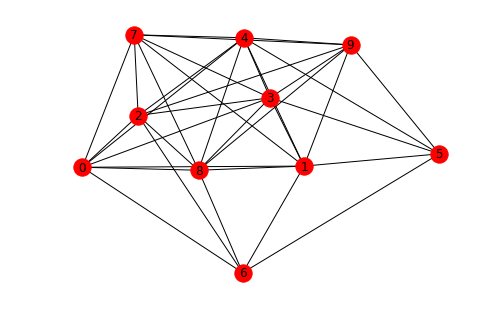

In [35]:
G = nx.dense_gnm_random_graph(10,35, seed=None)
nx.draw(G,with_labels=True)
plt.show()

n_n = G.number_of_nodes()
n_e = G.number_of_edges()

# G = nx.Graph()
# G.add_edges_from([(1,2),(1,3),(1,4),(4,5),(4,6),(4,7),(1,5),(3,6),(6,8),(6,9),(3,8)],index=0)
# nx.draw(G,with_labels=True)
# plt.show()

In [36]:
# 获取所有可能的边
oo = list()
for i in range(n_n-1):
    for j in range(i+1,n_n):
        oo.append((i,j))
        
u_edges = set(oo)
print(len(u_edges)) 

45


In [37]:
# 获取原本不存在的边
unexist_edges = u_edges - G.edges()
unexist_edges = list(unexist_edges)
print(len(unexist_edges)) 

10


In [38]:
# 从缺失链接和不存在链接中都随机抽取n_s个用于后续计算得分
n_s = 6

In [39]:
a = set(range(len(unexist_edges)))
b = set(random.sample(range(len(unexist_edges)),n_s)) 
b = list(b)

In [40]:
# 挑选出不存在的边用于后续计算预测得分
cho_unexist_edges = [unexist_edges[i] for i in b]
cho_unexist_edges

[(1, 2), (6, 9), (5, 7), (3, 6), (0, 9), (2, 5)]

In [41]:
a = set(range(n_e))
b = set(random.sample(range(n_e),int(n_e*0.2) )) # 存测试边的下标
c = a-b
b = list(b)
b = random.sample(b,n_s)                           # 随机挑选几个用于后续计算边的得分
c = list(c)                                      # 存用来建模的训练边的下标

In [42]:
all_edges = list(G.edges())
train_edges = [all_edges[i] for i in c]
cho_exist_edges = [all_edges[i] for i in b]
G = nx.Graph()
G.add_edges_from(train_edges)
print("节点的个数为",G.number_of_nodes())
print("边的条数为",G.number_of_edges())

节点的个数为 10
边的条数为 28


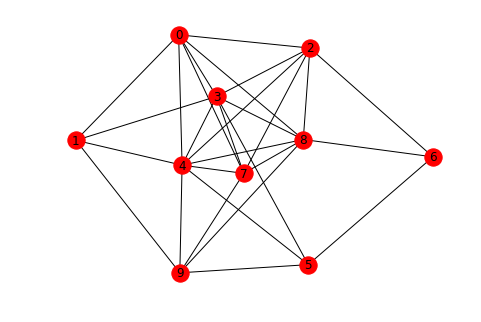

In [43]:
nx.draw(G,with_labels=True)
plt.show()

In [44]:
cho_exist_edges.extend(cho_unexist_edges)
# 保持缺失链接在不存在链接前
test_edges = cho_exist_edges

In [45]:
test_edges

[(3, 9),
 (1, 7),
 (1, 8),
 (0, 6),
 (1, 6),
 (1, 5),
 (1, 2),
 (6, 9),
 (5, 7),
 (3, 6),
 (0, 9),
 (2, 5)]

#### RA

In [46]:
preds = nx.resource_allocation_index(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

(3, 9) -> 0.93452381
(1, 7) -> 0.63452381
(1, 8) -> 0.63452381
(0, 6) -> 0.30952381
(1, 6) -> 0.00000000
(1, 5) -> 0.46785714
(1, 2) -> 0.43452381
(6, 9) -> 0.39285714
(5, 7) -> 0.46785714
(3, 6) -> 0.55952381
(0, 9) -> 0.68452381
(2, 5) -> 0.60119048


[0.9345238095238095,
 0.6345238095238095,
 0.6345238095238095,
 0.30952380952380953,
 0]

In [47]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 18
缺失链接与不存在链接得分相等的次数 1
auc_measure:  0.5555555555555556
Precision:  0.5


#### Adamic-Adar指标

In [48]:
preds = nx.adamic_adar_index(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

(3, 9) -> 2.99560236
(1, 7) -> 2.17424225
(1, 8) -> 2.17424225
(0, 6) -> 1.07200897
(1, 6) -> 0.00000000
(1, 5) -> 1.61613162
(1, 2) -> 1.55290732
(6, 9) -> 1.23524586
(5, 7) -> 1.61613162
(3, 6) -> 1.79335649
(0, 9) -> 2.27425484
(2, 5) -> 1.90503592


[2.995602356772949, 2.174242250443598, 2.174242250443598, 1.072008968920998, 0]

In [49]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 18
缺失链接与不存在链接得分相等的次数 1
auc_measure:  0.5555555555555556
Precision:  0.5


#### attachment score

In [50]:
preds = nx.preferential_attachment(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

(3, 9) -> 35.00000000
(1, 7) -> 24.00000000
(1, 8) -> 28.00000000
(0, 6) -> 18.00000000
(1, 6) -> 12.00000000
(1, 5) -> 16.00000000
(1, 2) -> 24.00000000
(6, 9) -> 15.00000000
(5, 7) -> 24.00000000
(3, 6) -> 21.00000000
(0, 9) -> 30.00000000
(2, 5) -> 24.00000000


[35, 24, 28, 18, 12]

In [51]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 15
缺失链接与不存在链接得分相等的次数 3
auc_measure:  0.5833333333333334
Precision:  0.5


#### katz

In [52]:
preds = compute_katz(G, test_edges)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

n 8
====
+++
3 9
[[3, 0, 1, 4, 2, 6, 5, 9], [3, 0, 1, 4, 2, 6, 8, 7, 9], [3, 0, 1, 4, 2, 6, 8, 9], [3, 0, 1, 4, 2, 7, 8, 9], [3, 0, 1, 4, 2, 7, 9], [3, 0, 1, 4, 2, 8, 6, 5, 9], [3, 0, 1, 4, 2, 8, 7, 9], [3, 0, 1, 4, 2, 8, 9], [3, 0, 1, 4, 5, 6, 2, 7, 9], [3, 0, 1, 4, 5, 6, 2, 8, 9], [3, 0, 1, 4, 5, 6, 8, 7, 9], [3, 0, 1, 4, 5, 6, 8, 9], [3, 0, 1, 4, 5, 9], [3, 0, 1, 4, 7, 2, 6, 5, 9], [3, 0, 1, 4, 7, 2, 6, 8, 9], [3, 0, 1, 4, 7, 2, 8, 9], [3, 0, 1, 4, 7, 8, 6, 5, 9], [3, 0, 1, 4, 7, 8, 9], [3, 0, 1, 4, 7, 9], [3, 0, 1, 4, 8, 2, 6, 5, 9], [3, 0, 1, 4, 8, 2, 7, 9], [3, 0, 1, 4, 8, 6, 2, 7, 9], [3, 0, 1, 4, 8, 6, 5, 9], [3, 0, 1, 4, 8, 7, 9], [3, 0, 1, 4, 8, 9], [3, 0, 1, 4, 9], [3, 0, 1, 9], [3, 0, 2, 4, 1, 9], [3, 0, 2, 4, 5, 6, 8, 7, 9], [3, 0, 2, 4, 5, 6, 8, 9], [3, 0, 2, 4, 5, 9], [3, 0, 2, 4, 7, 8, 6, 5, 9], [3, 0, 2, 4, 7, 8, 9], [3, 0, 2, 4, 7, 9], [3, 0, 2, 4, 8, 6, 5, 9], [3, 0, 2, 4, 8, 7, 9], [3, 0, 2, 4, 8, 9], [3, 0, 2, 4, 9], [3, 0, 2, 6, 5, 4, 1, 9], [3, 0, 2, 6, 5, 4, 7, 

1 5
[[1, 0, 2, 3, 4, 5], [1, 0, 2, 3, 4, 7, 8, 6, 5], [1, 0, 2, 3, 4, 7, 8, 9, 5], [1, 0, 2, 3, 4, 7, 9, 5], [1, 0, 2, 3, 4, 8, 6, 5], [1, 0, 2, 3, 4, 8, 7, 9, 5], [1, 0, 2, 3, 4, 8, 9, 5], [1, 0, 2, 3, 4, 9, 5], [1, 0, 2, 3, 4, 9, 8, 6, 5], [1, 0, 2, 3, 5], [1, 0, 2, 3, 7, 4, 5], [1, 0, 2, 3, 7, 4, 8, 6, 5], [1, 0, 2, 3, 7, 4, 8, 9, 5], [1, 0, 2, 3, 7, 4, 9, 5], [1, 0, 2, 3, 7, 8, 4, 5], [1, 0, 2, 3, 7, 8, 4, 9, 5], [1, 0, 2, 3, 7, 8, 6, 5], [1, 0, 2, 3, 7, 8, 9, 4, 5], [1, 0, 2, 3, 7, 8, 9, 5], [1, 0, 2, 3, 7, 9, 4, 5], [1, 0, 2, 3, 7, 9, 5], [1, 0, 2, 3, 7, 9, 8, 4, 5], [1, 0, 2, 3, 7, 9, 8, 6, 5], [1, 0, 2, 3, 8, 4, 5], [1, 0, 2, 3, 8, 4, 7, 9, 5], [1, 0, 2, 3, 8, 4, 9, 5], [1, 0, 2, 3, 8, 6, 5], [1, 0, 2, 3, 8, 7, 4, 5], [1, 0, 2, 3, 8, 7, 4, 9, 5], [1, 0, 2, 3, 8, 7, 9, 4, 5], [1, 0, 2, 3, 8, 7, 9, 5], [1, 0, 2, 3, 8, 9, 4, 5], [1, 0, 2, 3, 8, 9, 5], [1, 0, 2, 3, 8, 9, 7, 4, 5], [1, 0, 2, 4, 3, 5], [1, 0, 2, 4, 3, 7, 8, 6, 5], [1, 0, 2, 4, 3, 7, 8, 9, 5], [1, 0, 2, 4, 3, 7, 9, 5]

[28543796544, 37978782976, 34315681024, 25990698240, 15826708480]

In [53]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 26
缺失链接与不存在链接得分相等的次数 0
auc_measure:  0.7222222222222222
Precision:  0.833333333333


####  LP

In [54]:
# 很慢
preds = compute_LP(G, test_edges,5)
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

====
33333 5
+++
3 9
[[3, 0, 1, 4, 5, 9], [3, 0, 1, 4, 7, 9], [3, 0, 1, 4, 8, 9], [3, 0, 1, 4, 9], [3, 0, 1, 9], [3, 0, 2, 4, 1, 9], [3, 0, 2, 4, 5, 9], [3, 0, 2, 4, 7, 9], [3, 0, 2, 4, 8, 9], [3, 0, 2, 4, 9], [3, 0, 2, 6, 5, 9], [3, 0, 2, 6, 8, 9], [3, 0, 2, 7, 4, 9], [3, 0, 2, 7, 8, 9], [3, 0, 2, 7, 9], [3, 0, 2, 8, 4, 9], [3, 0, 2, 8, 7, 9], [3, 0, 2, 8, 9], [3, 0, 4, 1, 9], [3, 0, 4, 2, 7, 9], [3, 0, 4, 2, 8, 9], [3, 0, 4, 5, 9], [3, 0, 4, 7, 8, 9], [3, 0, 4, 7, 9], [3, 0, 4, 8, 7, 9], [3, 0, 4, 8, 9], [3, 0, 4, 9], [3, 0, 7, 2, 4, 9], [3, 0, 7, 2, 8, 9], [3, 0, 7, 4, 1, 9], [3, 0, 7, 4, 5, 9], [3, 0, 7, 4, 8, 9], [3, 0, 7, 4, 9], [3, 0, 7, 8, 4, 9], [3, 0, 7, 8, 9], [3, 0, 7, 9], [3, 0, 8, 2, 4, 9], [3, 0, 8, 2, 7, 9], [3, 0, 8, 4, 1, 9], [3, 0, 8, 4, 5, 9], [3, 0, 8, 4, 7, 9], [3, 0, 8, 4, 9], [3, 0, 8, 6, 5, 9], [3, 0, 8, 7, 4, 9], [3, 0, 8, 7, 9], [3, 0, 8, 9], [3, 1, 0, 2, 4, 9], [3, 1, 0, 2, 7, 9], [3, 1, 0, 2, 8, 9], [3, 1, 0, 4, 5, 9], [3, 1, 0, 4, 7, 9], [3, 1, 0, 4, 8, 9]

[0.10880000000000002,
 0.09240000000000001,
 0.09480000000000002,
 0.068,
 0.023600000000000003]

In [55]:
auc_measure = AUC(score,n_s)
p = Precision(score,n_s)
print("auc_measure: ",auc_measure) 
print("Precision: ",p)

缺失链接比不存在链接得分高的次数 15
缺失链接与不存在链接得分相等的次数 0
auc_measure:  0.4166666666666667
Precision:  0.5


## 结果对比

#### 实际数据（facebook社交数据）

In [63]:
zhibiao = ['RA','Adamic-Adar','attachment']
auc = [0.9958,0.9914,0.8123]
precision = [0.97,0.97,0.75]
a = {"指标":zhibiao,"AUC":auc,"Precision":precision}
df = pd.DataFrame(a)

In [65]:
df.set_index('指标', inplace=True)
df

,AUC,Precision
指标,,
RA,0.9958,0.97
Adamic-Adar,0.9914,0.97
attachment,0.8123,0.75


从计算出的AUC值来看，三种局域指标效果都较好，RA和Adamic-Adar都超过了0.99，对应的Precision值都是0.97

三种局域指标中，attachment的效果较差，但也AUC值达到了0.8123，对应的Precision值达到了0.75.

由于网络规模较大，计算全域指标和准局域指标需要耗费太多时间，故实际数据没有进行计算。

采用了规模较小的随机生成网络进行各种指标的对比。

#### 规模较小的随机生成网络

In [56]:
zhibiao = ['RA','Adamic-Adar','attachment','Katz','Lp']
auc = [0.556,0.556,0.58,0.72,0.41]
precision = [0.5,0.5,0.5,0.83,0.5]
a = {"指标":zhibiao,"AUC":auc,"Precision":precision}
df = pd.DataFrame(a)

In [61]:
df.set_index('指标', inplace=True)
df

,AUC,Precision
指标,,
RA,0.556,0.50
Adamic-Adar,0.556,0.50
attachment,0.580,0.50
Katz,0.720,0.83
Lp,0.410,0.50


从计算出的AUC和Precision值来看，全域指标Katz的效果最好。

其次是局域指标attachment。